In [1]:
import numpy as np
try:
    import pyaudio
except:
    !pip3 install pyaudio
    import pyaudio

import wave
import time

try:
    import librosa, librosa.display
except:
    !pip3 install librosa
    import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


In [2]:
FORMAT = pyaudio.paInt16
#FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
CHUNK = 512
RECORD_SECONDS = 20
WAVE_OUTPUT_FILENAME = "recordedFile.wav"
device_index = 2
audio = pyaudio.PyAudio()

In [3]:
print("----------------------record device list---------------------")
info = audio.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))

print("-------------------------------------------------------------")

----------------------record device list---------------------
Input Device id  0  -  Built-in Microphone
Input Device id  2  -  HoverCam Solo8+
Input Device id  3  -  LG UltraFine Display Audio
Input Device id  6  -  Jabra SPEAK 510 USB
Input Device id  7  -  Microsoft Teams Audio
Input Device id  8  -  ZoomAudioDevice
-------------------------------------------------------------


In [4]:
#index = int(input())
index = 3
print("recording via index "+str(index))

recording via index 3


In [5]:
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True, input_device_index = index,
                frames_per_buffer=CHUNK)
print ("recording started")
Recordframes = []

import struct

start = time.time()
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK, exception_on_overflow = False)
    Recordframes.append(data)
    if (i%100 == 0):
        print(f"{time.time() - start:.1f} ",  end = '')
tf = time.time() - start
print ("recording stopped")

signal = np.hstack(Recordframes)

stream.stop_stream()
stream.close()
audio.terminate()

recording started
0.0 1.2 2.3 3.5 4.7 5.8 7.0 8.2 9.3 10.5 11.6 12.8 14.0 15.1 16.3 17.4 18.6 19.8 recording stopped


In [6]:
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(Recordframes))
waveFile.close()

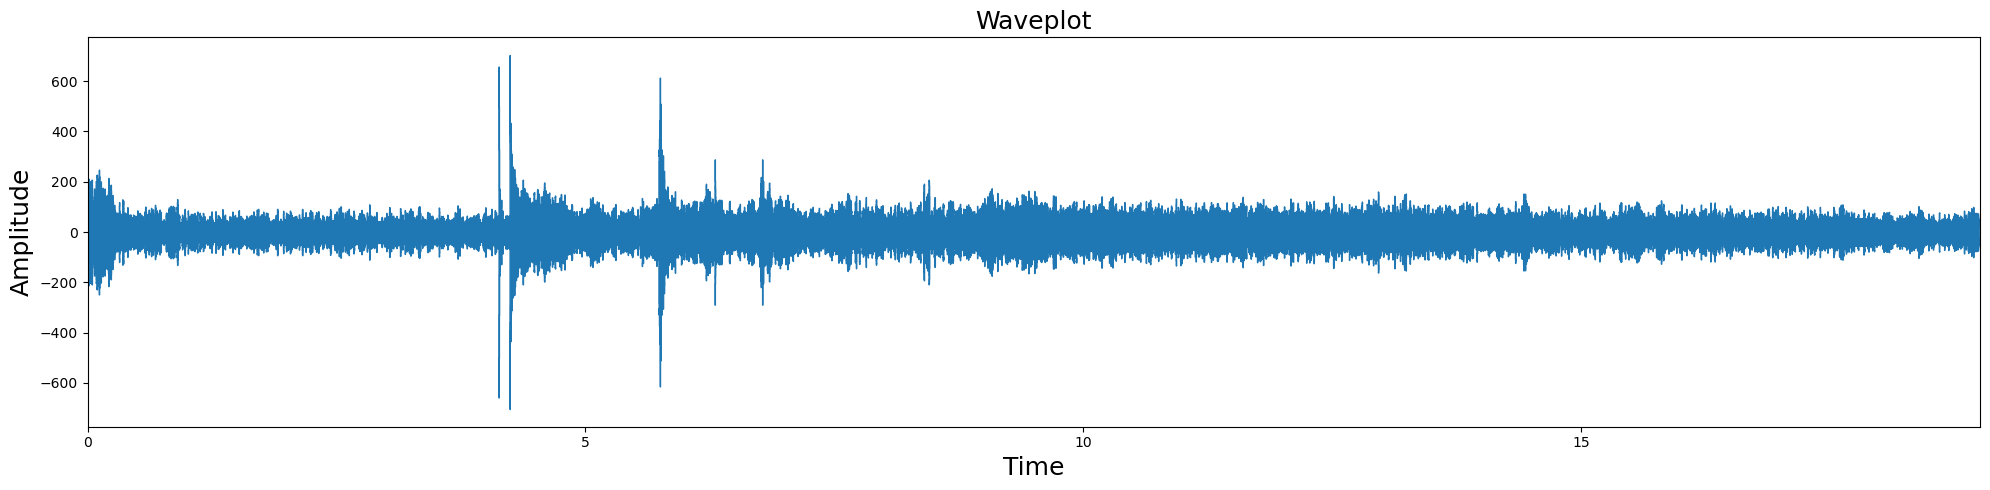

In [7]:
signal_f = np.frombuffer(signal, dtype='int16').astype('float32')
plt.figure(figsize=(20, 5))
t_ignore = 1
librosa.display.waveshow(signal_f[t_ignore*RATE:], sr=RATE)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=18))
plt.ylabel('Amplitude', fontdict=dict(size=18))
plt.xlim(0,tf-t_ignore)
plt.savefig('./data/mic_recorder_0.png', bbox_inches='tight', dpi=300)
plt.show()